In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
path_to_dataset = '/Users/tithighosh/Library/Application Support/AirDroid/Downloads/Fake news_/datasets/fake_news_dataset.csv'


In [15]:
data = pd.read_csv(path_to_dataset, index_col=0)

In [16]:
data.head()

date   day  flag                                               link  \
0  2018/03/29  29.0     0  http://timesofindia.indiatimes.com//city/nagpu...   
1  2017/01/24  24.0     0  http://timesofindia.indiatimes.com//india/jk-g...   
2  2017/01/31  31.0     0  http://timesofindia.indiatimes.com//city/kolha...   
3  2018/03/26  26.0     0  http://timesofindia.indiatimes.com//city/hubba...   
4  2017/02/20  20.0     0  http://timesofindia.indiatimes.com//city/mumba...   

   month     place publisher    year  \
0    3.0    nagpur       TOI  2018.0   
1    1.0       NaN       TOI  2017.0   
2    1.0  kolhapur       TOI  2017.0   
3    3.0  hubballi       TOI  2018.0   
4    2.0    mumbai       TOI  2017.0   

                                                Text  
0  NAGPUR: Villagers in Naxalite infested Gadchir...  
1  NEW DELHI: The Jammu & Kashmir government has ...  
2  KOLHAPUR: Robbers continue to give sleepless n...  
3  HUBBALLI: An iconic building, which is propose...  
4  MUMBAI: MNS chief   said that the   would lead...

## Validating Data

In [44]:
data['day'].unique()

array([29., 24., 31., 26., 20., 15., 28., 23., 19.,  5., 17., 18., 21.,
       25., 12., 30.,  6.,  4.,  2., 22., 10., 14.,  1., 27., 11.,  7.,
        9.,  8., 13.,  3., 16., nan])

In [59]:
data['month'].unique()

array([ 3.,  1.,  2.,  4.,  7.,  5.,  9.,  6., 10.,  8., 11., 12.])

In [60]:
data['year'].unique()

array([2018., 2017.])

## Missing Values

In [17]:
data.isnull().sum()

date             0
day              1
flag             0
link             0
month            1
place        63713
publisher        0
year             1
Text             0
dtype: int64

In [18]:
data['place'].isnull().sum()/data.shape[0]

0.3032133101091726

'place' has 30% missing values. So this attribute is dropped.

In [19]:
data.drop('place', axis=1, inplace=True)

'day' and 'year' have 1 missing value. So these observations are dropped only.

In [45]:
data.dropna(axis=0, inplace=True)

In [46]:
data.isnull().sum()

date         0
day          0
flag         0
link         0
month        0
publisher    0
year         0
Text         0
dtype: int64

:-)    

## Rearranging Columns

In [47]:
data.columns

Index(['date', 'day', 'flag', 'link', 'month', 'publisher', 'year', 'Text'], dtype='object')

In [48]:
arranged_data = data[['Text', 'date', 'day', 'link', 'month', 'publisher', 'year', 'flag']]

In [49]:
arranged_data.head()

Text        date   day  \
0  NAGPUR: Villagers in Naxalite infested Gadchir...  2018/03/29  29.0   
1  NEW DELHI: The Jammu & Kashmir government has ...  2017/01/24  24.0   
2  KOLHAPUR: Robbers continue to give sleepless n...  2017/01/31  31.0   
3  HUBBALLI: An iconic building, which is propose...  2018/03/26  26.0   
4  MUMBAI: MNS chief   said that the   would lead...  2017/02/20  20.0   

                                                link  month publisher    year  \
0  http://timesofindia.indiatimes.com//city/nagpu...    3.0       TOI  2018.0   
1  http://timesofindia.indiatimes.com//india/jk-g...    1.0       TOI  2017.0   
2  http://timesofindia.indiatimes.com//city/kolha...    1.0       TOI  2017.0   
3  http://timesofindia.indiatimes.com//city/hubba...    3.0       TOI  2018.0   
4  http://timesofindia.indiatimes.com//city/mumba...    2.0       TOI  2017.0   

   flag  
0     0  
1     0  
2     0  
3     0  
4     0

## Feature Selection

### Day  

In [50]:
grp = arranged_data.groupby('day')['flag'].sum()

<BarContainer object of 31 artists>

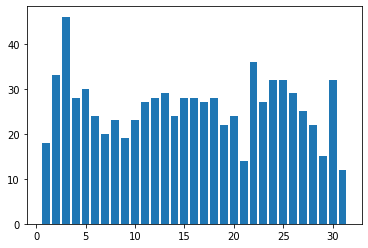

In [51]:
plt.bar(grp.index, grp.values)

In [52]:
plt.scatter(grp.index, grp.values)

In [53]:
# drop day? 

### Month 

In [54]:
grp = arranged_data.groupby('month')['flag'].sum()

In [55]:
plt.bar(grp.index, grp.values)

<BarContainer object of 12 artists>

In [75]:
# ------ split into two categories------

### Year  

In [73]:
# only 2 unique values ----> drop year

### Publisher

In [74]:
# only 1 unique value ----> drop publisher

### X-y split

In [78]:
# X ----> text, month
# y ----> flag

## Generating Test Data

In [79]:
# select 20% as unseen test data(shuffled)

## Train-Test Split

In [80]:
# train-test split on 80% test data